# Group Project: Determining Diamond Cut Grades Using KNN Classification

**Section 009 Group 2**

**Ziqing Wang**<br>**Anna Tao**<br>**Ruby de Lang**

### Introduction

The 4Cs: cut, clarity, color, and carat weight, are internationally accepted standards for assessing the quality of a diamond.  Diamond cut grade is a pivotal factor in determining the beauty and value of a diamond.

The dataset being used reports on the characteristics of diamonds. 
We want to use the KNN classification method to predict the cut grades of diamonds.

The columns of the dataset:
* **carat**: a unit of measurement for a diamond's weight.
* **cut**: cut grades of diamonds, measured in five scales (high to low): Ideal, Premium, Very good, Good, Fair.
* **color**: color is graded on a scale from D (colorless) to Z (light yellow or brown).
* **clarity**: the presence of internal and external flaws within a diamond.
* **depth**: the distance from the table to the culet (the bottom of the diamond).
* **table**: the flat, topmost facet of diamonds.
* **price**: The price of diamonds.
* **x**: the x-dimension of diamonds.
* **y**: the y-dimension of diamonds.
* **z**: the z-dimension of diamonds.

### Method Overview:

Our project wishes to identify whether we can use diamond data to predict the cut of a diamond.

1. Preliminary Exploratory Data Analysis: Prepare our dataset by reading and wrangling for further analysis.
2. Splitting Data: Split the filtered dataset into a testing and training set. Summarize the distribution of each categorical predictor variables for the training data.
3. Select Predictor Variables: Check for the relationship between each variable and the cut quality. Eliminate the variables with no visible correlation.
4. Create a Classification Model: Employ the K-nearest neighbors classification algorithm to identify the optimal K value. After identifying the most suitable value, run the model on the test set to check the accuracy value. 
5. Fulfill curiousity by checking whether the addition of predictor variables increases or decreases the accuracy of predictions. We will do this by adding predictor variables to our recipe, then running that model on the test set to check the accuracy value. 


### 1. Preliminary exploratory data analysis

In [1]:
# install.packages("tidyverse")
# install.packages("cowplot")
# install.packages("tidymodels")
# install.packages("kknn")
library(tidyverse)
library(ggplot2)
library(repr)
library(tidymodels)
library(readr)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

**Reading Data from Online Source Into R**

After reading the data from an online source into a CSV file in Jupyter, we have 53940 recorded observations.

In [2]:
diamond_data <- read_csv("https://raw.githubusercontent.com/rubydelang/sonar_data/main/diamonds.csv") 

head(diamond_data)

Rows: 53940 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): cut, color, clarity
dbl (7): carat, depth, table, price, x, y, z

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


**Mutating Data**\
To perform classification on cut column, we need to mutate the column type into a factor.

In [3]:
diamond_data <- diamond_data |>
mutate(cut = as_factor(cut))

**Checking for Missing Data**\
The 'na_rows' counts for the number of rows containing missing data, and the result of 0 means we do not have any missing data in this dataset.

In [4]:
na_rows <- sum(apply(is.na(diamond_data), 1, any))
print(na_rows)
summary(diamond_data)

[1] 0


     carat               cut           color             clarity         
 Min.   :0.2000   Ideal    :21551   Length:53940       Length:53940      
 1st Qu.:0.4000   Premium  :13791   Class :character   Class :character  
 Median :0.7000   Good     : 4906   Mode  :character   Mode  :character  
 Mean   :0.7979   Very Good:12082                                        
 3rd Qu.:1.0400   Fair     : 1610                                        
 Max.   :5.0100                                                          
     depth           table           price             x         
 Min.   :43.00   Min.   :43.00   Min.   :  326   Min.   : 0.000  
 1st Qu.:61.00   1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710  
 Median :61.80   Median :57.00   Median : 2401   Median : 5.700  
 Mean   :61.75   Mean   :57.46   Mean   : 3933   Mean   : 5.731  
 3rd Qu.:62.50   3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.: 6.540  
 Max.   :79.00   Max.   :95.00   Max.   :18823   Max.   :10.740  
       y            

**Tidy Data**

Now looking at the dataset, each row is a single observation, each column is a single variable, with meaningful column names, and each cell contains only a single value. 
Therefore, the data is already tidy, so we do not need to take any further actions. <br><br>

### 2. Splitting Data

**Splitting the data into training and testing data**

We have 53940 recorded observations that can be used for analysis. Our next step is to split the data into a training and testing set. We set the proportion to 0.75, this means 75% of our 53940 observations will be used towards the training set, and the remaining observations will be stored for the testing set. We set our seed to 2023 to create replicable randomized results.

In [5]:
set.seed(2023)
diamond_split <- initial_split(diamond_data, prop = 0.75, strata = cut)
diamond_training <- training(diamond_split)
diamond_testing <- testing(diamond_split)

**Selecting Predictors**

The plots below are used to select the predictors based on effectiveness to prediction. We can observe the box plots and select those that exhibit some type of relationship with the cut quality.

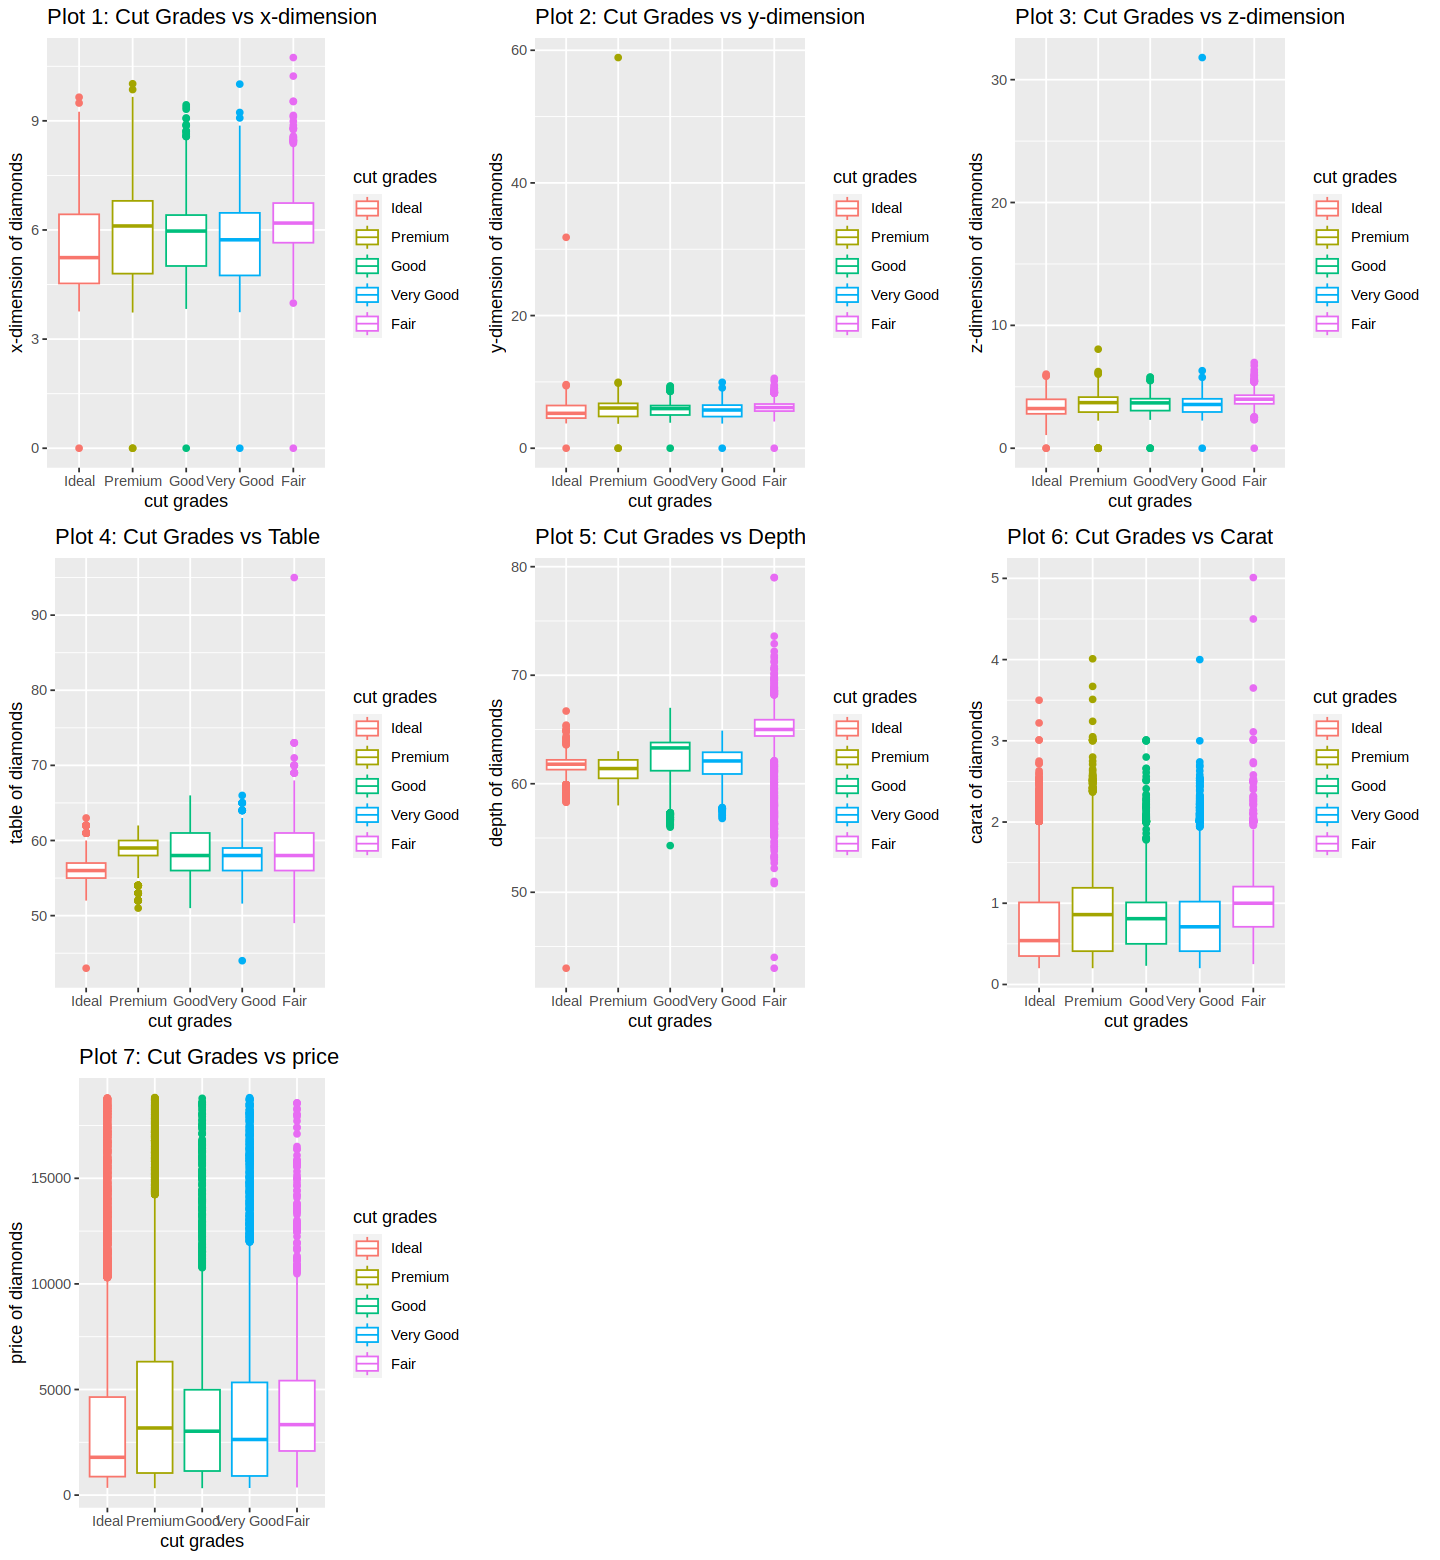

In [26]:
options(repr.plot.width = 12, repr.plot.height = 13)
x_cut_graph <- diamond_training |>
ggplot(aes(x = cut, y = x, color = cut)) +
geom_boxplot() +
ggtitle("Plot 1: Cut Grades vs x-dimension") +
labs(x ="cut grades", y = "x-dimension of diamonds", color = "cut grades")

y_cut_graph <- diamond_training |>
ggplot(aes(x = cut, y = y, color = cut)) +
geom_boxplot() +
ggtitle("Plot 2: Cut Grades vs y-dimension") +
labs(x ="cut grades", y = "y-dimension of diamonds", color = "cut grades")

z_cut_graph <- diamond_training |>
ggplot(aes(x = cut, y = z, color = cut)) +
geom_boxplot() +
ggtitle("Plot 3: Cut Grades vs z-dimension") +
labs(x ="cut grades", y = "z-dimension of diamonds", color = "cut grades")

table_cut_graph <- diamond_training |>
ggplot(aes(x = cut, y = table, color = cut)) +
geom_boxplot() +
ggtitle("Plot 4: Cut Grades vs Table") +
labs(x ="cut grades", y = "table of diamonds", color = "cut grades")

depth_cut_graph <- diamond_training |>
ggplot(aes(x = cut, y = depth, color = cut)) +
geom_boxplot() +
ggtitle("Plot 5: Cut Grades vs Depth") +
labs(x ="cut grades", y = "depth of diamonds", color = "cut grades")

carat_cut_graph <- diamond_training |>
ggplot(aes(x = cut, y = carat, color = cut)) +
geom_boxplot() +
ggtitle("Plot 6: Cut Grades vs Carat") +
labs(x ="cut grades", y = "carat of diamonds", color = "cut grades")

price_cut_graph <- diamond_training |>
ggplot(aes(x = cut, y = price, color = cut)) +
geom_boxplot() +
ggtitle("Plot 7: Cut Grades vs price") +
labs(x ="cut grades", y = "price of diamonds", color = "cut grades")

plot_grid(x_cut_graph, y_cut_graph, z_cut_graph, table_cut_graph, depth_cut_graph, carat_cut_graph, price_cut_graph, align = "h", ncol = 3)

The more separate the boxes are, the more accurate prediction it will make. Based on the graph, none of them have strong relationships with the cut grades. We can maximize the prediction accuracy by choosing the relatively associated factors like: depth and table. These two variables show a slight change in the cut quality.


In reality, the cut grades are classified based on how well the diamond can reflect light. x, y, z, depth, and table are symmetry factors and should be considered as predictors. However, based on the graphs we have plotted, the associations are weak. Therefore, we should only choose depth and table as predictors. If the accuracy is not desirable, we will add the x, y, and z in, and compare the accuracy. We will visualize the results by plotting the accuracy graphs. We hypothesize the addition of x, y, and z columns will not affect the accuracy too much because the boxes of each type look almost identical. 

### 3. Building a Classification Model

First, let's choose a reasonable k value to work with. We use tuning to select the best k value, and use cross validation to make sure the accuracy is not an unlucky value. **Warning: This step needs approximately 20 minutes to perform.**

**Creating a recipe**

Our first step in building the classification model is to create a recipe so our training data can be prepared to be used in the model. We included both the scale and center functions to ensure all our predictor variables have a mean of zero and standard deviation of one to ensure a bell curve distribution. 

In [7]:
diamond_recipe <- recipe(cut ~ depth+table, data = diamond_training) |>
step_scale(all_predictors()) |>
step_center(all_predictors())

**Creating a tuning model**

After scaling the training data, our next step is to identify the best K value. To begin the tuning process, we'll define a model specification for classification. The tune() function will then manage the tuning of all predictors within the model to select the optimal k-value for enhanced model performance.

In [8]:
set.seed(2023)

diamond_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

**Performing 5-fold cross validation**


Following the model tuning, we performed a 5-fold cross-validation to obtain four distinct accuracy estimates for our final outcome. Opting for five folds was based on the medium size of our data, making it best to split it into five chunks.

In [9]:
set.seed(2023)

diamond_vfold_5 <- vfold_cv(diamond_training, v = 5, strata = cut)

**Collecting metrics for many values of K**

We want to tune the model with different k values such as 1 to 150. First, we create a tibble using the seq() function starting from 1 (because we cannot tune the model with 0 neighbors), incrementing by 10, and stopping at 151 (our dataset is on the larger side, so more K values are necessary). This allows us the tune the parameters of the KNN model. 

In [10]:
k_vals <- tibble(neighbors = seq(from = 1, to = 151, by = 10))

**Workflow**

We then created a workflow for our model that includes the initial recipe (diamond_recipe), tuned spec (diamond_spec), and the tune_grid() function (this fits the model and all observations into a range specified from our tibble created earlier).

In [11]:
set.seed(2023)

diamond_fit_tune_1 <- workflow() |>
  add_recipe(diamond_recipe) |>
  add_model(diamond_spec) |>
  tune_grid(resamples = diamond_vfold_5, grid = k_vals)

**Collecting and Filtering the Accuracy**

We use the collect_metrics() function and filter() function to collect the mean and standard error values of all five accuracy values. This will leave us with only the filtered metrics of accuracy.

In [12]:
diamond_vfold_tune_metrics_1 <- diamond_fit_tune_1 |>
    collect_metrics() |> 
    filter(.metric == "accuracy")

**Accuracy vs k graph**

After filtering for the accuracy values, a visualization graph with the accuracies  vs neighbors is created to see which neighbour is the most stable. We estimate the nearest neighbor by looking at which one has the highest accuracy. 

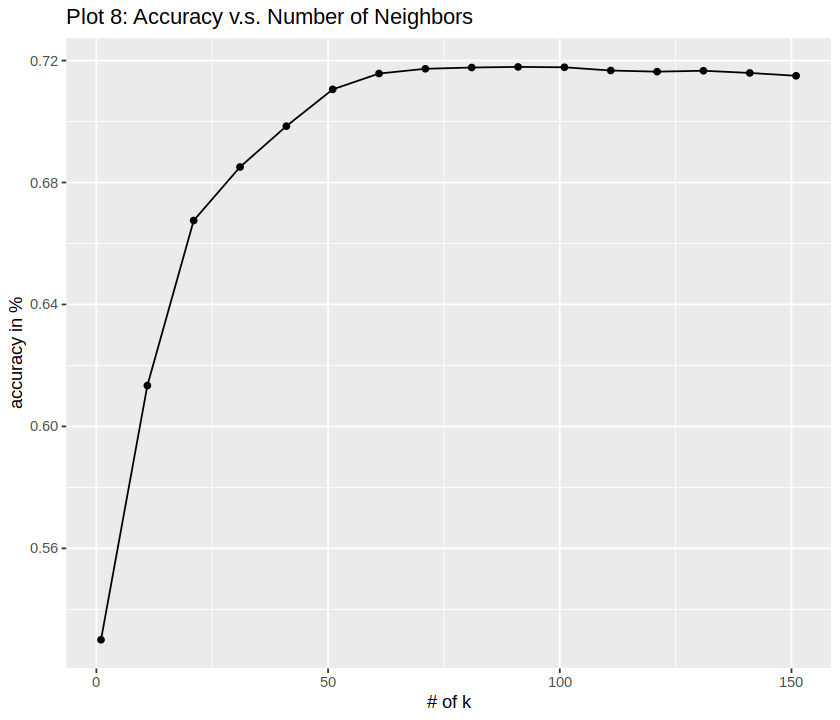

In [13]:
options(repr.plot.width = 7, repr.plot.height = 6)

accuracy_plot <- ggplot(diamond_vfold_tune_metrics_1, aes(x = neighbors, y = mean)) +
geom_point() +
geom_line() +
ggtitle("Plot 8: Accuracy v.s. Number of Neighbors")+
labs(x = "# of k", y = "accuracy in %")

accuracy_plot

The graph above suggests that the selection of k between 50-150 would be the best choice for K, so let's pick a relatively smaller number to speed up our remaining calculations. 70 looks to be a good k value to choose.

**Creating the optimized model with the new K value**

Now that we have identified the best k value (70), our next step is to run the same model using the best k value, but this time on our test set.

In [14]:
diamond_spec_final <- nearest_neighbor(weight_func = "rectangular", neighbors = 70) |>
  set_engine("kknn") |>
  set_mode("classification")

**Fitting the model**

Then we can fit the model according to the training model, initial recipe, and tuned model.

In [15]:
diamond_fit_final <- workflow() |>
  add_recipe(diamond_recipe) |>
  add_model(diamond_spec_final) |>
  fit(diamond_training)

**Determing classification model's accuracy using the test set**

The classification model is run now using the test set.

In [16]:
diamond_predict <- predict(diamond_fit_final, diamond_testing) |>bind_cols(diamond_testing)

diamond_prediction_accuracy <- diamond_predict |>
  metrics(truth = cut, estimate = .pred_class) |>
  filter(.metric == "accuracy")

diamond_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.7082376


We can see the final accuracy is 70.8%. 

### 4. Fulfilling Curiousity

Now we want to fulfill our curiosity. Will adding x,y,z as the predictors affect the accuracy, even the relationship graph from section 2 does not show strong relationships. So we can do that by repeating the same steps we used before.

**Creating the recipe**

We will create a recipe here, this time adding x, y, and z as predictors. Other than that we follow the same steps as before. 

In [17]:
diamond_recipe_curiosity <- recipe(cut ~ depth+table+x+y+z, data = diamond_training) |>
step_scale(all_predictors()) |>
step_center(all_predictors())

**Making the workflow**

Now we fit it to the workflow, this time adding our new recipe (diamond_fit_tune_curiosity), other than that, all our steps remain the same. We use the same model diamond_spec.

We then collect and filter the accuracy metrics to plot.

In [18]:
set.seed(2023)

diamond_fit_tune_curiosity <- workflow() |>
  add_recipe(diamond_recipe_curiosity) |>
  add_model(diamond_spec) |>
  tune_grid(resamples = diamond_vfold_5, grid = k_vals)

diamond_vfold_tune_metrics_curiosity <- diamond_fit_tune_curiosity |>
    collect_metrics() |> 
    filter(.metric == "accuracy")

**Plotting the curiosity accuracy graph**

Here, we plot a new plot to find the best k-value. Similar to our previous graph, we select the best k-value to be the one with the highest accuracy. 

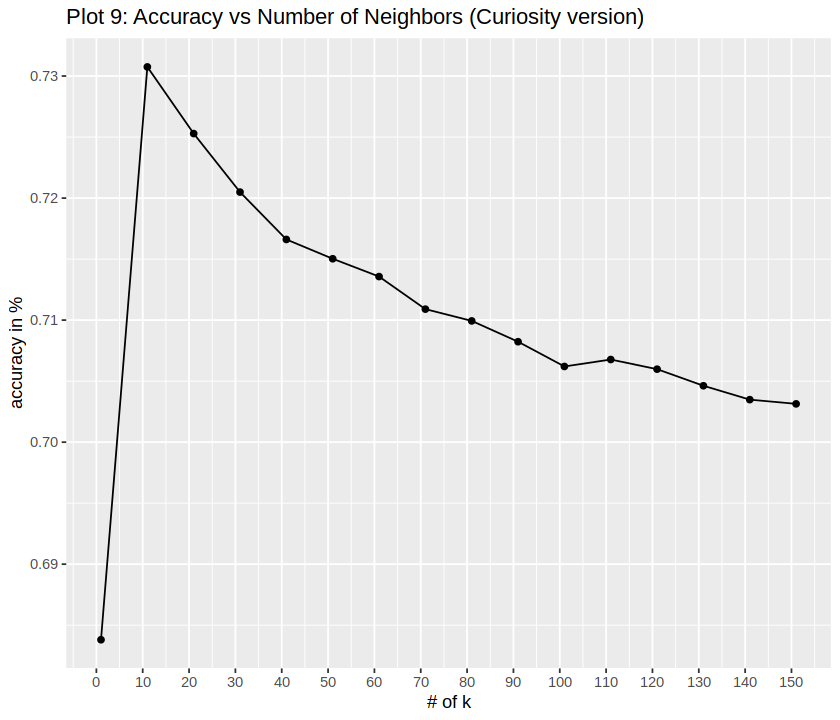

In [25]:
accuracy_curiosity_plot <- ggplot(diamond_vfold_tune_metrics_curiosity, aes(x = neighbors, y = mean)) +
geom_point() +
geom_line() +
labs(x = "# of k", y = "accuracy in %") +
ggtitle("Plot 9: Accuracy vs Number of Neighbors (Curiosity version)")+
scale_x_continuous(breaks = seq(from = 0, to = 150, by = 10))

accuracy_curiosity_plot

The graph above suggests the k value to be 10. Now let's test on the testing set.

**Creating curiousity model**

We create our tuning model using the best k value (10).

In [21]:
diamond_spec_curiosity <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) |>
  set_engine("kknn") |>
  set_mode("classification")

**Making the workflow**

Similar to when the training data was used for the classification model, we created a workflow for our model that includes our newly created recipe (diamond_recipe_curiousity), new model (diamond_spec_curiosity), and the fit() function to build the classifier.

In [22]:
diamond_fit_curiosity <- workflow() |>
  add_recipe(diamond_recipe_curiosity) |>
  add_model(diamond_spec_curiosity) |>
  fit(diamond_training)

**Determining the curiosity model's accuracy using the test set**

We then check the accuracy against the test set, which is approximately 72.7%.

In [23]:
diamond_predict_curiosity <- predict(diamond_fit_curiosity, diamond_testing) |>bind_cols(diamond_testing)

diamond_prediction_accuracy_curiosity <- diamond_predict_curiosity |>
  metrics(truth = cut, estimate = .pred_class) |>
  filter(.metric == "accuracy")

diamond_prediction_accuracy_curiosity

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.7273671


**Comparing results side-by-side**

In [24]:
diamond_prediction_accuracy
diamond_prediction_accuracy_curiosity

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.7082376


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.7273671


With only depth and table as our predictors, the accuracy is 70.8%, and after adding the x, y, z as the predictors, the accuracy is increased by 2%. Just like we hypothesized, the addition of the x,y,z does not affect the accuracy too much, even though they are also the geometry factors.

### Discussion

The expected outcome is that the cut grade prediction accuracy will be low, as the associations are not strong. In terms of impacts, if the accuracy is desirable, the model can speed up the process of grading the diamonds.

**1. Summary of Results**\
Through this data analysis, it was found that some of the geometry factors, the depth and table, are the main two quantitative predictors that can be used to predict the cut quality of diamonds. When the model ran with those two being used as predictors, it was found that the accuracy of the prediction is 70.8%. The model was then tested again but this time, with the remaining geometry factors x,y,z added as the predictors, the accuracy was increased to 72.7% (1.9% accuracy increase). The main takeaway from this finding is that while geometric factors affect the overall visual aesthetic of the diamond, some of them might not have a very significant impact on the cut quality prediction.

**2. Relation to Expectations**\
This is in line to what was expected with the prediction models. As seen in the box plots created in the method section, the predictive capabilities did not appear to look very strong from the get-go.

**3. Future Impacts**\
This can have impacts on the future of the diamond industry as it was found through this that some geometric factors such as x,y,z in this case, have very little impact on the quality of the cut when depth and table are already provided. The implications of this are that the process of grading diamonds can be streamlined and speed up. 

**4. Future questions**
1. What factors do affect the cut of the diamond the most?
2. How can we improve the prediction accuracy? 
3. What other factors not considered in our model influence the prediction of cut quality?

### References

1. BRILLIANT EARTH. (n.d.). Why Is A Diamond’s Cut Important?. https://www.brilliantearth.com/en-ca/diamond/buying-guide/cut/
2. Gemological Institute of America. (n.d.). Diamond. https://www.gia.edu/diamond
3. Pedersen, U. (Feb, 2023). Diamonds. https://www.kaggle.com/datasets/ulrikthygepedersen/diamonds